In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

### Getting data, cleaning, and preprocessing it for SML 

In [2]:
df = pd.read_csv('california_housing.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.fillna(df.mean(), inplace=True)

In [4]:
df.dropna(axis=1, inplace =True)

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
df.drop("Id",axis=1, inplace = True)

In [7]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


####  Strings/Words encoded into numbers for Machine Learning

In [8]:
columns_to_be_encoded = list(df.drop(["SalePrice"], axis=1).columns)
for column in columns_to_be_encoded:
    le = preprocessing.LabelEncoder()
    le.fit(list(df[column].values))
    df[column] = le.transform(list(df[column].values))

In [9]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,36,327,1,3,3,0,4,0,...,0,0,0,0,0,1,2,8,4,208500
1,0,3,52,498,1,3,3,0,2,0,...,0,0,0,0,0,4,1,8,4,181500
2,5,3,39,702,1,0,3,0,4,0,...,0,0,0,0,0,8,2,8,4,223500
3,6,3,31,489,1,0,3,0,0,0,...,108,0,0,0,0,1,0,8,0,140000
4,5,3,56,925,1,0,3,0,2,0,...,0,0,0,0,0,11,2,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,267,1,3,3,0,4,0,...,0,0,0,0,0,7,1,8,4,175000
1456,0,3,57,866,1,3,3,0,4,0,...,0,0,0,0,0,1,4,8,4,210000
1457,6,3,37,415,1,3,3,0,4,0,...,0,0,0,0,17,4,4,8,4,266500
1458,0,3,39,505,1,3,3,0,4,0,...,38,0,0,0,0,3,4,8,4,142125


In [10]:
list(zip(df.dtypes.index,df.dtypes.values))

[('MSSubClass', dtype('int64')),
 ('MSZoning', dtype('int32')),
 ('LotFrontage', dtype('int64')),
 ('LotArea', dtype('int64')),
 ('Street', dtype('int32')),
 ('LotShape', dtype('int32')),
 ('LandContour', dtype('int32')),
 ('Utilities', dtype('int32')),
 ('LotConfig', dtype('int32')),
 ('LandSlope', dtype('int32')),
 ('Neighborhood', dtype('int32')),
 ('Condition1', dtype('int32')),
 ('Condition2', dtype('int32')),
 ('BldgType', dtype('int32')),
 ('HouseStyle', dtype('int32')),
 ('OverallQual', dtype('int64')),
 ('OverallCond', dtype('int64')),
 ('YearBuilt', dtype('int64')),
 ('YearRemodAdd', dtype('int64')),
 ('RoofStyle', dtype('int32')),
 ('RoofMatl', dtype('int32')),
 ('Exterior1st', dtype('int32')),
 ('Exterior2nd', dtype('int32')),
 ('MasVnrArea', dtype('int64')),
 ('ExterQual', dtype('int32')),
 ('ExterCond', dtype('int32')),
 ('Foundation', dtype('int32')),
 ('BsmtFinSF1', dtype('int64')),
 ('BsmtFinSF2', dtype('int64')),
 ('BsmtUnfSF', dtype('int64')),
 ('TotalBsmtSF', dtype(

###  Splitting data into train and test

In [11]:
X_df = df.drop(["SalePrice"], axis=1)
y_df = df["SalePrice"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df,test_size=0.20, random_state = 42)


####  Different Applications of Supervised Machine Learning Models:

#####  1.a  RandomForestRegressor

In [13]:
reg = RandomForestRegressor()

In [48]:
list(X_train.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [15]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
predictions = list(reg.predict(X_test))

In [17]:
training_score = reg.score(X_train, y_train)
testing_score = reg.score(X_test, y_test)

In [18]:
print(f"Training Score RFR: {training_score}")
print(f"Testing Score RFR: {testing_score}")

Training Score RFR: 0.9785606081191256
Testing Score RFR: 0.8931409550280168


In [19]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Training Score RFR Scaled: {training_score}")
print(f"Testing Score RFR Scaled: {testing_score}")

Training Score RFR Scaled: 0.9785606081191256
Testing Score RFR Scaled: 0.8931409550280168


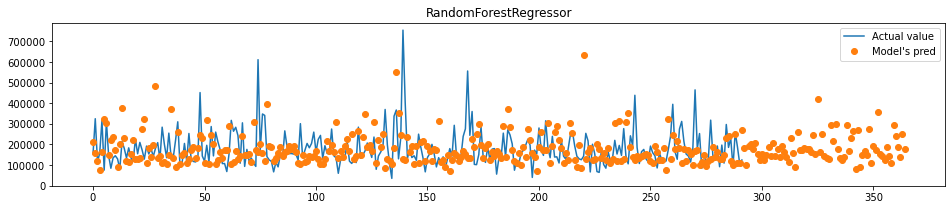

In [44]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (16,3))
ax.plot(list(y_test))
ax.plot(predictions, 'o')
plt.legend(["Actual value", "Model's pred"], loc='upper right')
plt.title("RandomForestRegressor")
plt.savefig("../images/RandForestPred.png")
plt.show()

#### 1.b Feature selection applied improve RandomForestRegressor

In [46]:
features = reg.feature_importances_
features = sorted(features, reverse=True)

AttributeError: 'ElasticNet' object has no attribute 'feature_importances_'

In [45]:
features

[0.561460873676203,
 0.14250028351483726,
 0.057774965981464456,
 0.056178465886937826,
 0.05560700417871523,
 0.049590200218625514,
 0.04483722016604468,
 0.032050986377172]

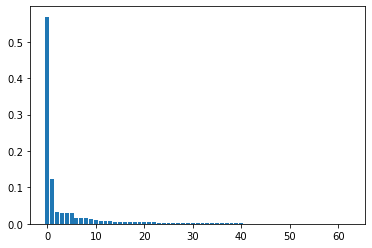

In [22]:
plt.bar(x = range(len(features)), height=features)
plt.show()

In [23]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(reg)
sel

SelectFromModel(estimator=RandomForestRegressor())

In [40]:
sel.fit(X_train, y_train)
sel.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [42]:
X_selected_train

array([[ 552,    7,  594, ...,    0,  520,    2],
       [1027,    4,  581, ...,   51,  448,    2],
       [ 196,    5,  220, ...,  295,  646,    2],
       ...,
       [ 169,    5,    0, ...,   89,  311,    0],
       [   6,    5,  143, ...,   51,  104,    1],
       [1010,    2,    0, ...,    0,   61,    3]], dtype=int64)

In [25]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_df), y_df, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)


In [26]:
reg_sel = RandomForestRegressor().fit(X_selected_train_scaled, y_train)
print(f'Training Score RFR Sel: {reg_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score RFR Sel: {reg_sel.score(X_selected_test_scaled, y_test)}')

Training Score RFR Sel: 0.9732461626893262
Testing Score RFR Sel: 0.9117146108153239


In [27]:
features = reg_sel.feature_importances_
features = sorted(features, reverse=True)
features

[0.561460873676203,
 0.14250028351483726,
 0.057774965981464456,
 0.056178465886937826,
 0.05560700417871523,
 0.049590200218625514,
 0.04483722016604468,
 0.032050986377172]

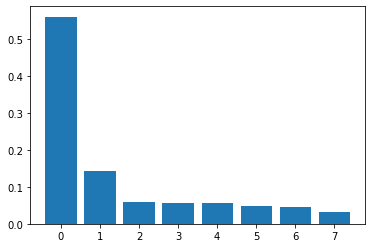

In [28]:
plt.bar(x = range(len(features)), height=features)
plt.show()

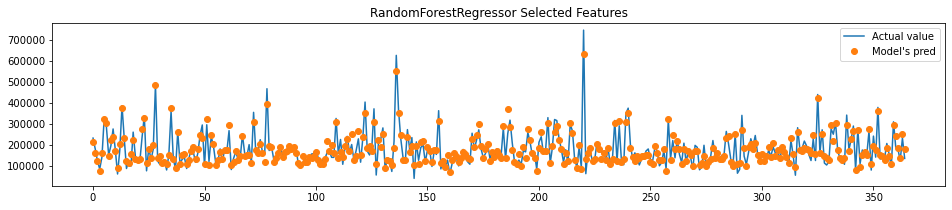

In [29]:
import matplotlib.pyplot as plt
predictions = list(reg_sel.predict(X_selected_test_scaled))
fig,ax=plt.subplots(figsize = (16,3))
ax.plot(list(y_test))
ax.plot(predictions, 'o')
plt.legend(["Actual value", "Model's pred"], loc='upper right')
plt.title("RandomForestRegressor Selected Features")
plt.savefig("../images/RandForestPredFeature.png")
plt.show()

In [30]:
import joblib

In [31]:
joblib.dump(reg_sel,"trained_rand_forest_selected.joblib")

['trained_rand_forest_selected.joblib']

### 2. a. Linear Regression model before scaled:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df,test_size=0.20, random_state = 42)

Model: Linear Regression
Score: 0.8305169552245177



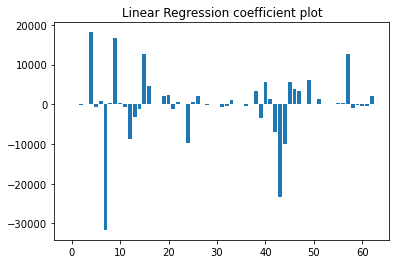

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print('Model: Linear Regression')
print(f'Score: {reg.score(X_test, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'Linear Regression coefficient plot')
plt.savefig("../images/LinearRegCoef.png")
plt.show()

#### 2. b. Linear Regression model scaled test model improvement:

In [34]:
scaler= StandardScaler()
X_df_scaled=scaler.fit_transform(X_df)
X_train_scaled,X_test_scaled,y_train,y_test=train_test_split(X_df_scaled,y_df,test_size=0.2,random_state=42)

Model: Linear Regression Scaled
Score: 0.8305169552245144



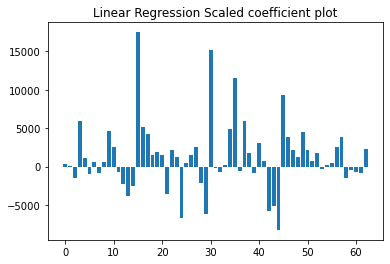

In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train)
print('Model: Linear Regression Scaled')
print(f'Score: {reg.score(X_test_scaled, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'Linear Regression Scaled coefficient plot')
plt.savefig("../images/LinearRegCoefScaled.png")
plt.show()

### 2. c. LASSO Regression model:

Model: LASSO Regression
Score: 0.8305100007888072



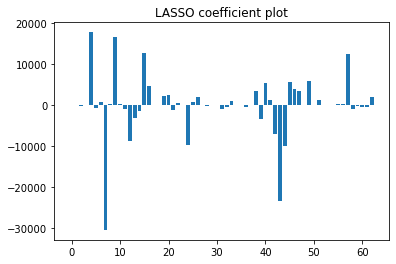

In [36]:
from sklearn.linear_model import Lasso
reg = Lasso(max_iter=2000).fit(X_train, y_train)
print('Model: LASSO Regression')
print(f'Score: {reg.score(X_test, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'LASSO coefficient plot')
plt.savefig("../images/LassoRegCoef.png")
plt.show()    

Model: Ridge Regression
Score: 0.8305084457719771



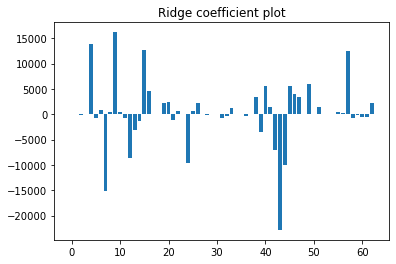

In [37]:
from sklearn.linear_model import Ridge
reg = Ridge().fit(X_train, y_train)
print('Model: Ridge Regression')
print(f'Score: {reg.score(X_test, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'Ridge coefficient plot')
plt.savefig("../images/RidgeRegCoef.png")
plt.show()    


### 2. d. Ridge Regression model:

### 2. e. ElasticNet Regression model:

Model: ElasticNet Regression
Score: 0.8208558837285806



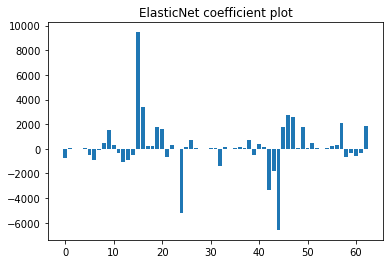

In [38]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(max_iter=2000).fit(X_train, y_train)
print('Model: ElasticNet Regression')
print(f'Score: {reg.score(X_test, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'ElasticNet coefficient plot')
plt.savefig("../images/ElasticNetCoef.png")
plt.show()